In [1]:
#loading reviews and labels
f = open('reviews.txt')
reviews = list(map(lambda x:x[:-1], f.readlines()))
f.close()

f = open('labels.txt')
labels = list(map(lambda x:x[:-1].upper(), f.readlines()))
f.close()

def print_review_and_label(n):
    print(labels[n] + " :\t\t" + reviews[n][:80] + "...")

In [2]:
len(reviews), len(labels)

(25000, 25000)

In [3]:
print_review_and_label(1)
print_review_and_label(102)
print_review_and_label(3004)
print_review_and_label(6543)
print_review_and_label(4341)

NEGATIVE :		story of a man who has unnatural feelings for a pig . starts out with a opening ...
POSITIVE :		i avoided watching this film for the longest time . long before it was even rele...
POSITIVE :		this is a fascinating account of the hunt for the soviet union  s first known se...
NEGATIVE :		ok when i saw the previews for this movie i thought it looked really scary and w...
NEGATIVE :		this movie was terrible . throughout the whole movie  i was puzzled and did not ...


In [4]:
from collections import Counter
import numpy as np

In [5]:
# Three counter to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [6]:
# Looping over all the reviews and incrementing the appropriate counter
for i in range(len(reviews)):
    if labels[i] == 'POSITIVE':
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [7]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [8]:
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

In [9]:
# Creating a positive-negative ratio counter
pos_neg_ratios = Counter()
for word, count in list(total_counts.most_common()):
    if count>100:
        pos_neg_ratio = positive_counts[word] / float(1 + negative_counts[word])
        pos_neg_ratios[word] = pos_neg_ratio

In [10]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


In [11]:
# Converting ratios to log
for word, ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)

In [12]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.7291085042663878


In [13]:
# most common words in positive reviews
pos_neg_ratios.most_common()[0:30]

[('edie', 4.6913478822291435),
 ('paulie', 4.07753744390572),
 ('felix', 3.152736022363656),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.80672172860924),
 ('victoria', 2.681021528714291),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.538973871058276),
 ('flawless', 2.451005098112319),
 ('superbly', 2.26002547857525),
 ('perfection', 2.159484249353372),
 ('astaire', 2.1400661634962708),
 ('captures', 2.038619547159581),
 ('voight', 2.030170492673053),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.978345424808467),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('soccer', 1.757857

In [14]:
# most common words in negative reviews
pos_neg_ratios.most_common()[-31:-1]

[('godzilla', -1.9568392195875037),
 ('insult', -1.978345424808467),
 ('lame', -1.981767458946166),
 ('uninspired', -1.9832976811269336),
 ('sucks', -1.987068221548821),
 ('miserably', -1.9924301646902063),
 ('boredom', -1.995100393246085),
 ('existent', -2.0794415416798357),
 ('remotely', -2.1972245773362196),
 ('wasting', -2.204604684633842),
 ('poorly', -2.2207550747464135),
 ('awful', -2.227194247027435),
 ('laughable', -2.264363880173848),
 ('worst', -2.286987896180378),
 ('lousy', -2.307572634505085),
 ('drivel', -2.3470368555648795),
 ('prom', -2.3608540011180215),
 ('redeeming', -2.3682390632154826),
 ('atrocious', -2.4259083090260445),
 ('pointless', -2.4553061800117097),
 ('horrid', -2.4849066497880004),
 ('blah', -2.5704288232261625),
 ('waste', -2.6193845640165536),
 ('unfunny', -2.6922395950755678),
 ('incoherent', -2.9368917735310576),
 ('mst', -2.9502698994772336),
 ('stinker', -3.2088254890146994),
 ('unwatchable', -3.258096538021482),
 ('seagal', -3.644143560272545),
 

# Transforming Texts into Numbers

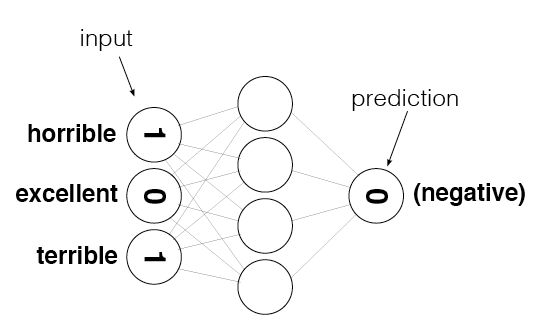

In [15]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='assets/sentiment_network_neg.png')

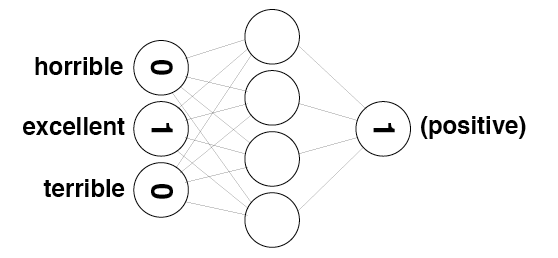

In [16]:
review = "This was a excellent movie."

Image(filename='assets/sentiment_network_pos.png')

# Creating the Input/Output data

In [17]:
# Create set named "vocab" containing all of the words from all of the reviews
vocab = set(total_counts.keys())

In [18]:
len(vocab)

74074

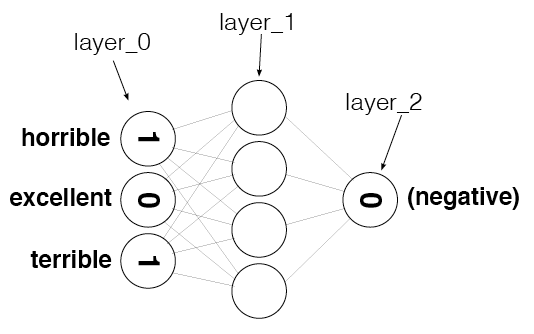

In [19]:
from IPython.display import Image
Image(filename='assets/sentiment_network.png')

In [20]:
# Create layer_0 matrix with dimensions 1 by vocab_size, initially filled with zeros
layer_0 = np.zeros([1,len(vocab)])
layer_0.shape

(1, 74074)

In [21]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
word2index = {}
for i, word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'lagge': 12257,
 'shalhoub': 1,
 'foch': 34531,
 'waiting': 2,
 'stribor': 3,
 'bahiyyaji': 4,
 'trademarked': 73131,
 'implausibly': 5,
 'oui': 24687,
 'zack': 6,
 'bensonhurst': 7,
 'orchestrated': 8,
 'nooooooooooooooooooooo': 10,
 'tralala': 49357,
 'refracted': 12,
 'sanctioning': 13,
 'zips': 14,
 'buckheimer': 15,
 'visiting': 16,
 'damiella': 18,
 'contains': 61837,
 'elkjaer': 19,
 'shutting': 20,
 'america': 24690,
 'tibetans': 54139,
 'sarandon': 21,
 'ej': 27,
 'beachcomber': 32,
 'accountancy': 24,
 'furlong': 25,
 'maupassant': 26,
 'misuse': 57251,
 'seminary': 31,
 'prerogatives': 33,
 'mockmuntaries': 34,
 'magnific': 38,
 'escalates': 36,
 'whitmire': 37,
 'stereophonic': 39,
 'dentisty': 40,
 'slew': 41,
 'optical': 46603,
 'someup': 42,
 'zelina': 43,
 'huey': 44,
 'abomination': 47,
 'fueling': 48,
 'lepus': 52,
 'mellow': 50,
 'kik': 51,
 'vane': 54069,
 'zang': 54,
 'triffids': 55,
 'premises': 56,
 'hsd': 57,
 'brethren': 58,
 'stair': 59,
 'angeles': 6

In [22]:
def update_input_layer(review):
    global layer_0
    # clear out previous state by resetting the layer to be all 0s
    layer_0 *= 0
    
    # count how many times each word is used in the given review and store the results in layer_0
    for word in review.split(' '):
        layer_0[0][word2index[word]] += 1

In [23]:
# testing
update_input_layer(reviews[0])
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
def get_target_for_label(label):
    if label == 'POSITIVE':
        return 1
    return 0

In [25]:
labels[0], get_target_for_label(labels[0])

('POSITIVE', 1)

In [26]:
labels[1], get_target_for_label(labels[1])

('NEGATIVE', 0)

# Building a Neural Network

In [27]:
import time
import sys
import numpy as np

class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(' '):
                review_vocab.add(word)
                
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i;
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, size=(self.hidden_nodes, self.output_nodes))
        
        # TODO: Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        self.layer_0 *= 0
        for word in review.split(' '):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
        
                
    def get_target_for_label(self,label):
        if label == 'POSITIVE':
            return 1
        return 0
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output*(1-output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            # fordward pass
            # input layer
            self.update_input_layer(review)
            # hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)
            # output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            # backward pass
            # output error
            layer_2_error = layer_2 - self.get_target_for_label(label)
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)
            #hidden error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)
            layer_1_delta = layer_1_error
            
            # update the weights
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate
            
            
            # Keep track of correct predictions
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        self.update_input_layer(review.lower())
        layer_1 = np.dot(self.layer_0, self.weights_0_1)
        layer_2 = self.sigmoid(np.dot(layer_1, self.weights_1_2))        

        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [28]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [29]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:14.9% Speed(reviews/sec):774.0 #Correct:75 #Tested:150 Testing Accuracy:50.0%

Progress:29.5% Speed(reviews/sec):776.3 #Correct:148 #Tested:296 Testing Accuracy:50.0%

Progress:44.7% Speed(reviews/sec):787.6 #Correct:224 #Tested:448 Testing Accuracy:50.0%

Progress:59.2% Speed(reviews/sec):783.0 #Correct:297 #Tested:593 Testing Accuracy:50.0%

Progress:74.3% Speed(reviews/sec):788.3 #Correct:372 #Tested:744 Testing Accuracy:50.0%

Progress:87.3% Speed(reviews/sec):772.5 #Correct:437 #Tested:874 Testing Accuracy:50.0%

Progress:99.2% Speed(reviews/sec):752.9 #Correct:497 #Tested:993 Testing Accuracy:50.0%

Progress:99.9% Speed(reviews/sec):751.4 #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [30]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):121.1 #Correct:1251 #Trained:2501 Training Accuracy:50.0%
Progress:20.8% Speed(reviews/sec):128.8 #Correct:2501 #Trained:5001 Training Accuracy:50.0%
Progress:31.2% Speed(reviews/sec):134.1 #Correct:3751 #Trained:7501 Training Accuracy:50.0%
Progress:41.6% Speed(reviews/sec):137.0 #Correct:5001 #Trained:10001 Training Accuracy:50.0%
Progress:52.0% Speed(reviews/sec):138.3 #Correct:6251 #Trained:12501 Training Accuracy:50.0%
Progress:62.5% Speed(reviews/sec):139.5 #Correct:7501 #Trained:15001 Training Accuracy:50.0%
Progress:72.9% Speed(reviews/sec):140.4 #Correct:8751 #Trained:17501 Training Accuracy:50.0%
Progress:83.3% Speed(reviews/sec):141.0 #Correct:10001 #Trained:20001 Training Accuracy:50.0%
Progress:93.7% Speed(reviews/sec):141.3 #Correct:11251 #Trained:22501 Training Accuracy:50.0%
Progress:99.9% Speed(reviews/sec):141.6 #Correct:12000 #Trained:24000 Training Ac

In [31]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):146.1 #Correct:1248 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):145.5 #Correct:2498 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):145.1 #Correct:3748 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):145.1 #Correct:4998 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):145.1 #Correct:6248 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):145.0 #Correct:7496 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):145.0 #Correct:8746 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):145.1 #Correct:9996 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):145.1 #Correct:11246 #Trained:22501 Training Accuracy:49.9%
Progress:99.9% Speed(reviews/sec):145.1 #Correct:11995 #Trained:24000 Training Acc

In [32]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):146.1 #Correct:1266 #Trained:2501 Training Accuracy:50.6%
Progress:20.8% Speed(reviews/sec):145.8 #Correct:2640 #Trained:5001 Training Accuracy:52.7%
Progress:31.2% Speed(reviews/sec):145.6 #Correct:4101 #Trained:7501 Training Accuracy:54.6%
Progress:41.6% Speed(reviews/sec):145.4 #Correct:5613 #Trained:10001 Training Accuracy:56.1%
Progress:52.0% Speed(reviews/sec):145.4 #Correct:7175 #Trained:12501 Training Accuracy:57.3%
Progress:62.5% Speed(reviews/sec):145.4 #Correct:8791 #Trained:15001 Training Accuracy:58.6%
Progress:72.9% Speed(reviews/sec):145.3 #Correct:10338 #Trained:17501 Training Accuracy:59.0%
Progress:83.3% Speed(reviews/sec):145.1 #Correct:12035 #Trained:20001 Training Accuracy:60.1%
Progress:93.7% Speed(reviews/sec):145.1 #Correct:13702 #Trained:22501 Training Accuracy:60.8%
Progress:99.9% Speed(reviews/sec):145.1 #Correct:14775 #Trained:24000 Training A

# Reducing noise in out data

In [34]:
import time
import sys
import numpy as np

class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(' '):
                review_vocab.add(word)
                
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i;
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, size=(self.hidden_nodes, self.output_nodes))
        
        # TODO: Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        self.layer_0 *= 0
        for word in review.split(' '):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1
        
                
    def get_target_for_label(self,label):
        if label == 'POSITIVE':
            return 1
        return 0
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output*(1-output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            # fordward pass
            # input layer
            self.update_input_layer(review)
            # hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)
            # output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            # backward pass
            # output error
            layer_2_error = layer_2 - self.get_target_for_label(label)
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)
            #hidden error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)
            layer_1_delta = layer_1_error
            
            # update the weights
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate
            
            
            # Keep track of correct predictions
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        self.update_input_layer(review.lower())
        layer_1 = np.dot(self.layer_0, self.weights_0_1)
        layer_2 = self.sigmoid(np.dot(layer_1, self.weights_1_2))        

        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [35]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [37]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):147.8 #Correct:1809 #Trained:2501 Training Accuracy:72.3%
Progress:20.8% Speed(reviews/sec):147.7 #Correct:3813 #Trained:5001 Training Accuracy:76.2%
Progress:31.2% Speed(reviews/sec):147.6 #Correct:5903 #Trained:7501 Training Accuracy:78.6%
Progress:41.6% Speed(reviews/sec):147.5 #Correct:8053 #Trained:10001 Training Accuracy:80.5%
Progress:52.0% Speed(reviews/sec):147.7 #Correct:10187 #Trained:12501 Training Accuracy:81.4%
Progress:62.5% Speed(reviews/sec):147.5 #Correct:12317 #Trained:15001 Training Accuracy:82.1%
Progress:72.9% Speed(reviews/sec):147.0 #Correct:14430 #Trained:17501 Training Accuracy:82.4%
Progress:83.3% Speed(reviews/sec):146.3 #Correct:16605 #Trained:20001 Training Accuracy:83.0%
Progress:93.7% Speed(reviews/sec):145.7 #Correct:18795 #Trained:22501 Training Accuracy:83.5%
Progress:99.9% Speed(reviews/sec):145.6 #Correct:20117 #Trained:24000 Training

In [38]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:20.0% Speed(reviews/sec):1122. #Correct:174 #Tested:201 Testing Accuracy:86.5%

Progress:42.0% Speed(reviews/sec):1150. #Correct:367 #Tested:421 Testing Accuracy:87.1%

Progress:63.4% Speed(reviews/sec):1146. #Correct:543 #Tested:635 Testing Accuracy:85.5%

Progress:85.4% Speed(reviews/sec):1153. #Correct:725 #Tested:855 Testing Accuracy:84.7%

Progress:99.9% Speed(reviews/sec):1158. #Correct:853 #Tested:1000 Testing Accuracy:85.3%